In [6]:
import numpy as np
import pickle
np.seed = 1101
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
import os
ROOT = '/home/ansuini/repos/WellTemperedSGD/'
os.chdir(ROOT)

In [4]:
mb_size = 10
n = 300

In [12]:
RES = os.path.join(ROOT,'results','modified', str(mb_size) + '_' + str(n)  )
modified = pickle.load( open( os.path.join(RES, 'training_data.pt' ), 'rb' ) )
RES = os.path.join(ROOT,'results','original', str(mb_size) + '_' + str(n)  )
original = pickle.load( open( os.path.join(RES, 'training_data.pt' ), 'rb' ) )

In [16]:
import mnist_archs
model = mnist_archs.LeNet()

In [18]:
win = 30
layer_names = [m[0] for idx,m in enumerate(model.named_modules()) ][1:]
layer_names

['conv1', 'conv2', 'fc1', 'fc2']

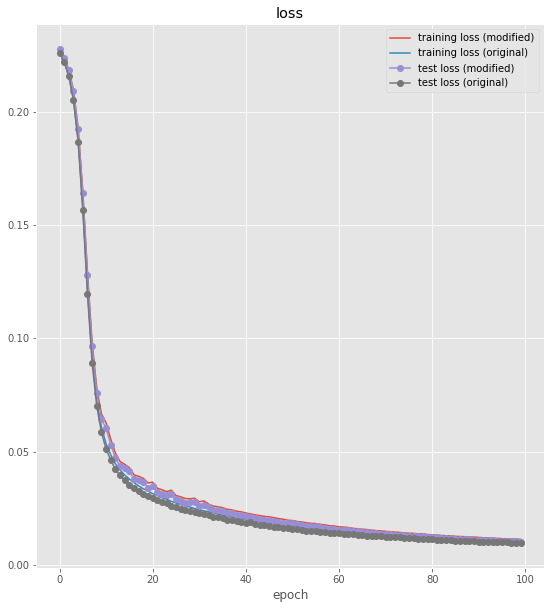

In [26]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(modified['train_stats'][:,0],'-',label='training loss (modified)')
plt.plot(original['train_stats'][:,0],'-',label='training loss (original)')
plt.plot(modified['test_stats'][:,0],'-o',label='test loss (modified)')
plt.plot(original['test_stats'][:,0],'-o',label='test loss (original)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(modified['test_stats'][:,1],'-o',label='test acc (modified)')
plt.plot(original['test_stats'][:,1],'-o',label='test acc (original)')

#plt.plot(test_stats[:,0],'-o',label='test loss')

plt.xlabel('epoch')
plt.title('loss')

plt.legend()

plt.savefig('comparison.png')

    
plt.show()